In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the CSV file
file_path = 'atp_cleaned_data.csv'
tennis_data = pd.read_csv(file_path)

# Selecting relevant features for clustering (excluding the 'player' column)
features = tennis_data.drop(columns=['player'])

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the shape of the scaled features to verify
scaled_features.shape

(353, 23)

In [2]:
# Filling missing values with the mean of each column
features_imputed = pd.DataFrame(scaled_features).fillna(pd.DataFrame(scaled_features).mean())

In [3]:
from sklearn.cluster import KMeans

# Applying K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features_imputed)

# Adding the cluster labels to the original dataset
tennis_data['cluster'] = kmeans.labels_

# Display the first few rows with the cluster labels
tennis_data.head()

,player,firstServeIn_per,secondServeIn_per,ace_per,first_serve_won_per,second_serve_won_per,forehand_winner_per,backhand_winner_per,forehand_unforced_error_per,backhand_unforced_error_per,...,net_point_winByError_per,winner_per,err_per,pts_won_Ite_3_shots_per,shots_in_pts_won_per,shots_in_pts_lost_per,shots_in_won_vs_lost_ratio,inside_in_per,inside_out_per,cluster
0,Aaron Krickstein,51.57,48.43,4.63,29.54,22.18,4.99,3.69,7.72,8.90,...,53.01,25.510,28.176667,25.73,43.51,56.49,0.78,2.10,8.72,0
1,Adam Pavlasek,65.96,34.04,8.51,46.81,29.79,10.28,3.74,7.48,6.54,...,26.19,29.690,31.780000,30.82,60.00,40.00,1.50,2.15,12.37,1
2,Adrian Mannarino,65.61,34.39,8.13,44.69,18.64,4.95,3.48,9.87,7.11,...,46.16,24.208,33.811000,34.81,52.36,47.64,1.16,0.48,5.45,1
3,Adriano Panatta,62.73,37.27,1.82,33.64,15.45,8.19,5.17,9.05,7.76,...,29.00,33.000,34.480000,24.89,40.00,60.00,0.67,0.00,6.03,3
4,Agustin Calleri,53.57,46.43,4.76,38.10,20.24,10.80,6.82,11.36,15.91,...,21.42,43.750,44.890000,21.24,38.64,61.36,0.63,1.23,11.55,2


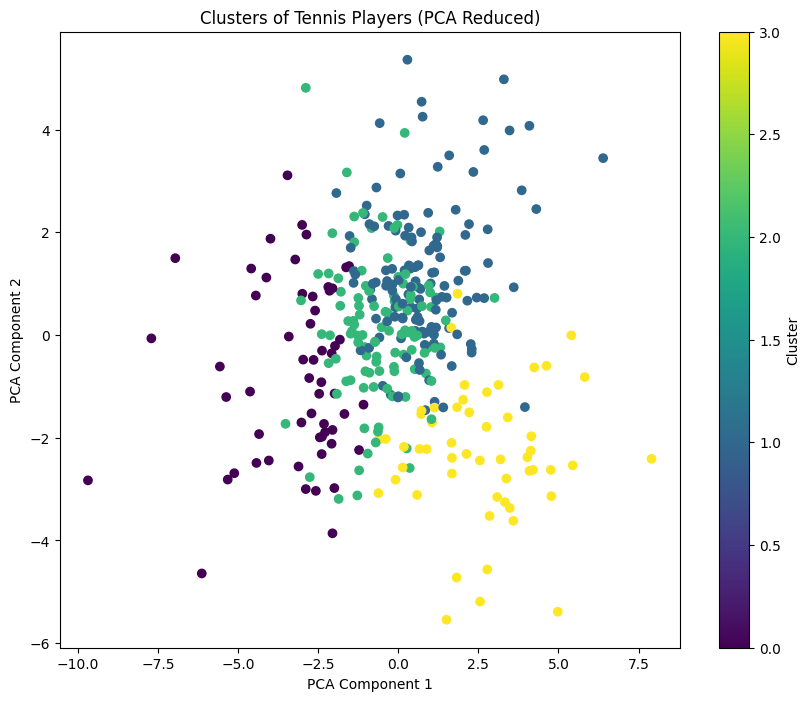

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Applying PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_imputed)

# Plotting the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=tennis_data['cluster'], cmap='viridis')
plt.title('Clusters of Tennis Players (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()